In [2]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [7]:
# Drop rows with null in critical columns
df.dropna(subset=['country', 'date_added', 'rating', 'duration'], inplace=True)


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2214
cast             671
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
df['type'].value_counts()

type
Movie      5687
TV Show    2274
Name: count, dtype: int64

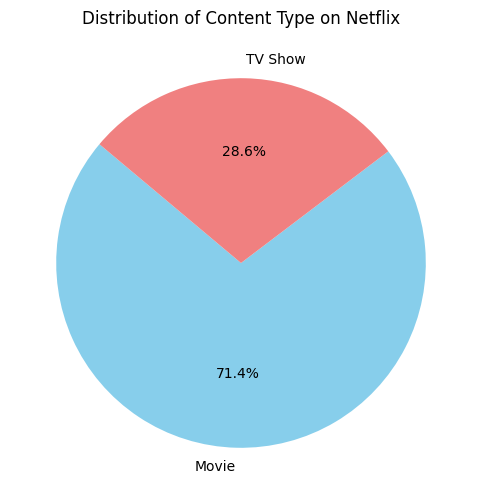

In [10]:
import matplotlib.pyplot as plt

type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral']
)
plt.title('Distribution of Content Type on Netflix')
plt.show()

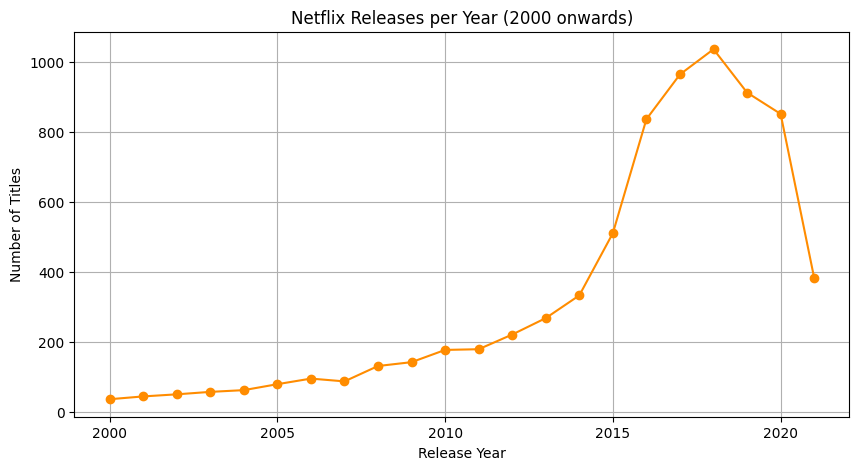

In [13]:
import matplotlib.pyplot as plt

recent = df[df['release_year'] >= 2000]
yearly_counts = recent['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='darkorange')
plt.title('Netflix Releases per Year (2000 onwards)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

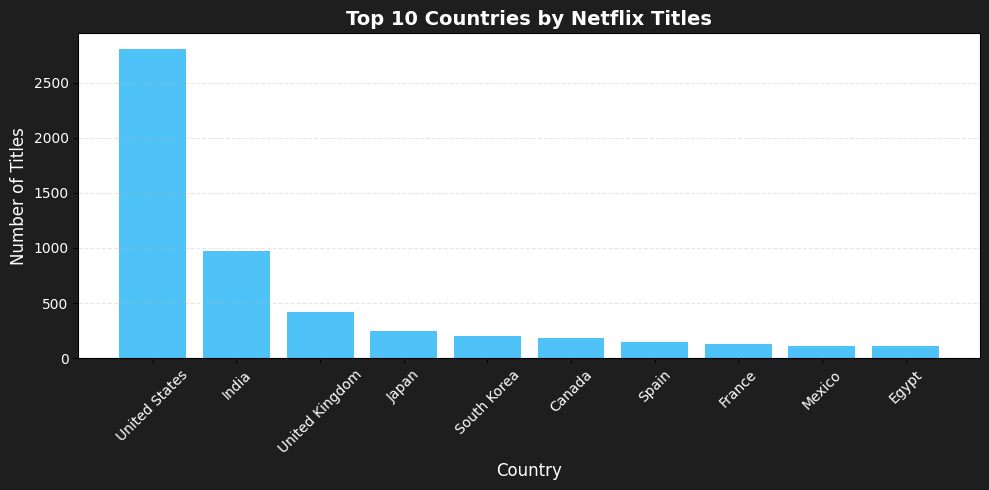

In [16]:
top_countries = df['country'].value_counts().head(10)

# Professional dark-themed bar chart
plt.figure(figsize=(10,5), facecolor='#1e1e1e')  # VSCode dark grey

plt.bar(top_countries.index, top_countries.values, color='#4FC3F7')  # Calm blue bars

# White text and labels
plt.title('Top 10 Countries by Netflix Titles', color='white', fontsize=14, weight='bold')
plt.xlabel('Country', color='white', fontsize=12)
plt.ylabel('Number of Titles', color='white', fontsize=12)

# Ticks
plt.xticks(rotation=45, color='white', fontsize=10)
plt.yticks(color='white', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.3)  # Subtle horizontal grid lines

plt.tight_layout()
plt.show()

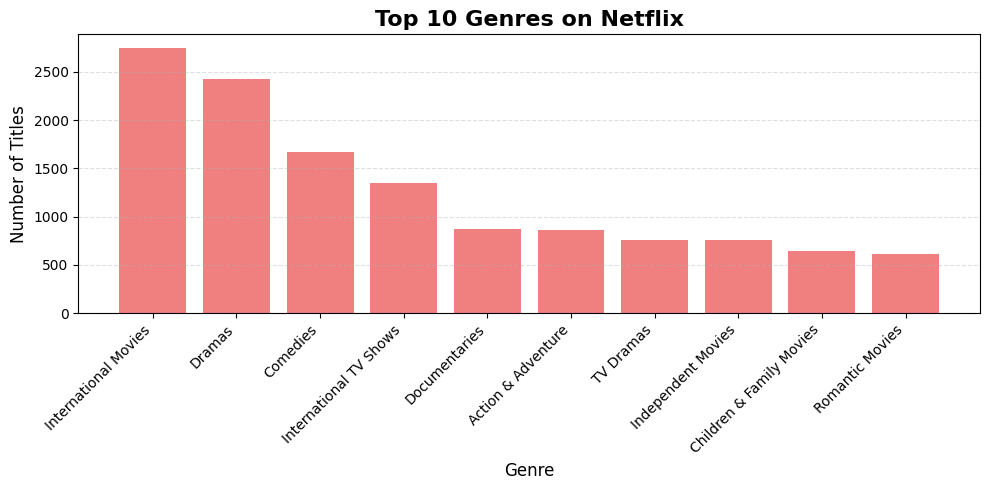

In [4]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("netflix_titles.csv")



genre_series = df['listed_in'].dropna().str.split(',').explode().str.strip()
top_genre = genre_series.value_counts().head(10)

plt.figure(figsize=(10,5))  # Wider plot

# Bar chart with a modern Netflix-ish red
plt.bar(top_genre.index, top_genre.values, color='lightcoral')

# Labels and titles
plt.title('Top 10 Genres on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)

# X-axis formatting
plt.xticks(rotation=45, ha='right', fontsize=10)

# Light grid on Y-axis
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()
